In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [6]:
df = df[df["RestingBP"] > 0].reset_index(drop=True)

I am removing rows where RestingBP ≤ 90 because very low blood pressure values could be errors or outliers. Keeping them might affect the model’s accuracy, so I remove them to keep the data clean and reliable.

In [7]:
df[df["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
514,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
517,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
534,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [8]:
cholesterol_median = df[df["Cholesterol"] > 0]["Cholesterol"].median()
df["Cholesterol"].replace(0, cholesterol_median, inplace=True)

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
#Encoding categorical columns
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["ChestPainType", "RestingECG", "ST_Slope", "ExerciseAngina", "Sex"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
# Drop original categorical columns
df = df.drop(columns=categorical_cols)

df = pd.concat([df, encoded_df], axis=1)

I am using one-hot encoding because categorical values like "ChestPainType" and "ST_Slope" do not have a natural order. One-hot encoding prevents the model from assuming any ranking between categories, making it more accurate.

In [11]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y,Sex_F,Sex_M
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,110,264,0,132,1.2,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
913,68,144,193,1,141,3.4,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
914,57,130,131,0,115,1.2,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
915,57,130,236,0,174,0.0,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


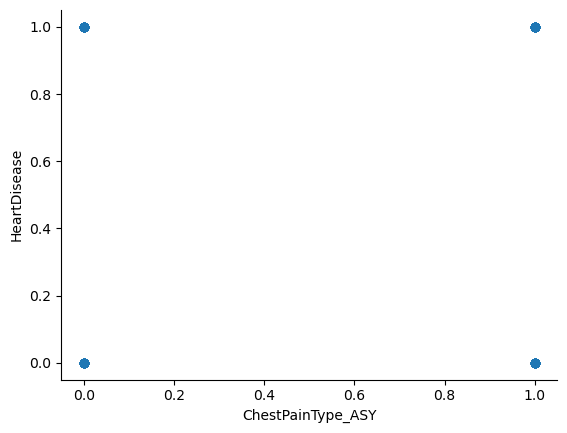

In [12]:
df.plot(kind='scatter', x='ChestPainType_ASY', y='HeartDisease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP',
    'ChestPainType_TA','RestingECG_LVH','RestingECG_Normal','RestingECG_ST','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N',
    'ExerciseAngina_Y','Sex_F','Sex_M']].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y,Sex_F,Sex_M
Age,1.000000,0.263084,0.045556,0.198170,-0.382280,0.258563,0.282012,0.166903,-0.218113,-0.011681,...,0.145837,-0.230793,0.136903,0.138451,0.185499,-0.258027,-0.216017,0.216017,-0.055670,0.055670
RestingBP,0.263084,1.000000,0.086062,0.067823,-0.109693,0.174252,0.117990,0.041568,-0.051374,-0.027536,...,0.050648,-0.113759,0.089156,-0.010323,0.110171,-0.105969,-0.153064,0.153064,-0.009427,0.009427
Cholesterol,0.045556,0.086062,1.000000,0.024851,-0.001510,0.054583,0.076262,0.073971,-0.005199,-0.060496,...,0.084284,-0.043392,-0.032304,-0.013993,0.087480,-0.081183,-0.072751,0.072751,0.111122,-0.111122
FastingBS,0.198170,0.067823,0.024851,1.000000,-0.131067,0.053062,0.267994,0.130629,-0.140844,-0.038201,...,-0.011965,-0.092588,0.126853,0.104961,0.107683,-0.162346,-0.059988,0.059988,-0.120424,0.120424
MaxHR,-0.382280,-0.109693,-0.001510,-0.131067,1.000000,-0.161213,-0.401410,-0.354444,0.254214,0.133411,...,0.126242,0.023181,-0.157561,-0.073127,-0.343641,0.384339,0.370023,-0.370023,0.189668,-0.189668
Oldpeak,0.258563,0.174252,0.054583,0.053062,-0.161213,1.000000,0.403638,0.280936,-0.261903,-0.107615,...,0.087140,-0.117293,0.056283,0.322371,0.282874,-0.450299,-0.409494,0.409494,-0.105444,0.105444
HeartDisease,0.282012,0.117990,0.076262,0.267994,-0.401410,0.403638,1.000000,0.518339,-0.401680,-0.215311,...,0.011174,-0.092452,0.103067,0.122852,0.553700,-0.621843,-0.495490,0.495490,-0.305118,0.305118
ChestPainType_ASY,0.166903,0.041568,0.073971,0.130629,-0.354444,0.280936,0.518339,1.000000,-0.523403,-0.576929,...,0.001691,-0.062707,0.075916,0.103157,0.305186,-0.360850,-0.429495,0.429495,-0.184631,0.184631
ChestPainType_ATA,-0.218113,-0.051374,-0.005199,-0.140844,0.254214,-0.261903,-0.401680,-0.523403,1.000000,-0.256306,...,-0.086081,0.108422,-0.046381,-0.097913,-0.304346,0.357324,0.300947,-0.300947,0.161294,-0.161294
ChestPainType_NAP,-0.011681,-0.027536,-0.060496,-0.038201,0.133411,-0.107615,-0.215311,-0.576929,-0.256306,1.000000,...,0.036413,0.003352,-0.041317,-0.040340,-0.074256,0.095585,0.164722,-0.164722,0.067682,-0.067682


In [14]:
X =df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA',
       'RestingECG_LVH','RestingECG_Normal','RestingECG_ST','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y','Sex_F'
       ,'Sex_M']]
y = df['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

I am selecting all columns in X after correlation because even if some features have a weak direct relationship with heart disease, they might still help the model when combined with other features. Removing them might lose useful information.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ChestPainType_ASY','ChestPainType_ATA',
                                               'ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH','RestingECG_Normal','RestingECG_ST',
                                               'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y','Sex_F','Sex_M']])
X_test_scaled=scaler.transform(X_test[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ChestPainType_ASY','ChestPainType_ATA',
                                       'ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH','RestingECG_Normal','RestingECG_ST','ST_Slope_Down',
                                       'ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y','Sex_F','Sex_M']])

In [16]:
print("Mean:\n",X_train_scaled.mean(axis=0)) 
print("\nSTD:\n",X_train_scaled.std(axis=0))  

Mean:
 [-2.30223601e-16  5.93734551e-16  4.84681266e-17  3.57452434e-17
  4.94374891e-16 -4.11979076e-17 -1.55098005e-16 -7.99724089e-17
  1.21170316e-17 -5.57383456e-17  2.42340633e-17 -4.36213139e-17
  5.57383456e-17  2.30223601e-17 -5.21032361e-17 -1.93872506e-17
 -1.69638443e-17 -8.23958152e-17  2.78691728e-17 -2.78691728e-17]

STD:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=20)

In [18]:
knn.predict(X_test_scaled)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [19]:
k_values = range(1, 50,2)

In [20]:
accuracy_score(y_test,knn.predict(X_test_scaled))

0.875

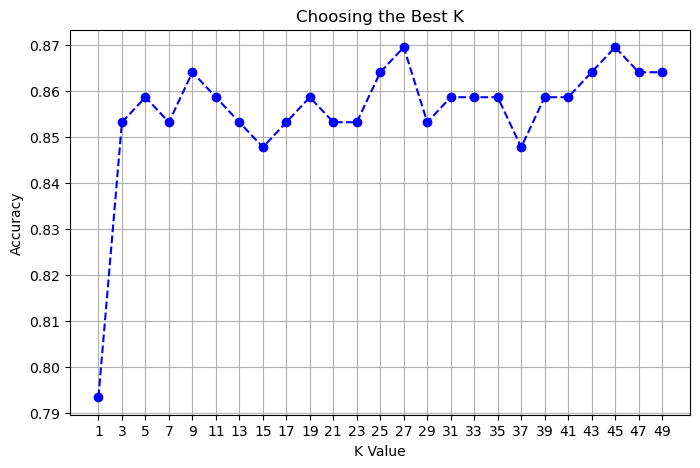

Best K: 27


<Figure size 640x480 with 0 Axes>

In [21]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()
# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

Here in below the Confussion and Classification Report of A Model

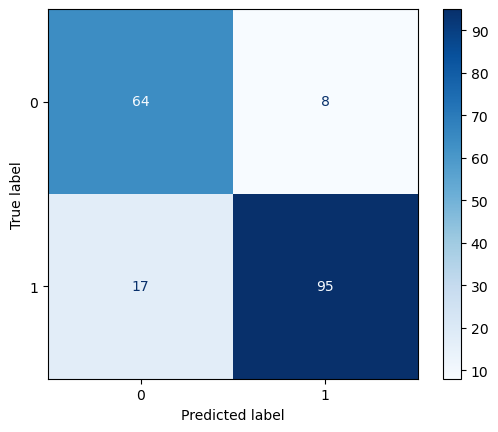

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [23]:
report  = classification_report(y_test, knn.predict(X_test_scaled))
print(report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        72
           1       0.92      0.85      0.88       112

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.87       184

